In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random_image = np.random.randint(0, 256, (256,256))

(256, 256)


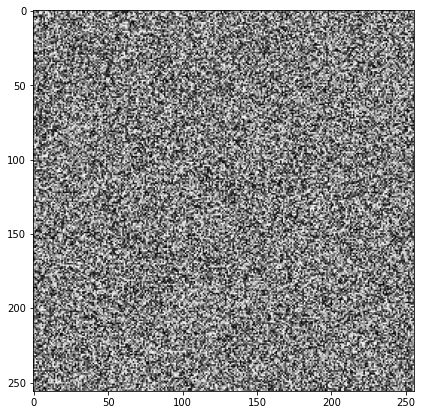

In [3]:
print(random_image.shape)
plt.figure(figsize=(7, 7))
plt.imshow(random_image,cmap='gray',vmin=0, vmax=255)
plt.show()

In [4]:
import os
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from tqdm import tqdm
from PIL import Image
    

In [5]:
def create_dataset(training_df,image_dir):
    
    images = []
    
    targets = []
    
    for index,row in tqdm(training_df.iterrows(),
                         total = len(training_df),
                         desc = 'processing_images'):
        
        image_id = row['ImageId']
        
        image_path = os.path.join(image_dir,image_id)
    
        image = Image.open(image_path + ".png")
        
        image = image.resize((256,256),resample=Image.BILINEAR)
        
        image = np.array(image)
        
        image = image.ravel()
        
        images.append(image)
        
        targets.append(int(row['target']))
        
        
    images = np.array(images)
    
    print(images.shape)
    
    return images,targets

In [6]:
if __name__ == '__main__':
    
    img_path = '/Users/v0m01sk/Documents/Code/AAAMLP/code/data/siim_png/train_png/'
    csv_path = '/Users/v0m01sk/Documents/Code/AAAMLP/code/data/train-rle.csv'
    
    df = pd.read_csv(csv_path)
    
    df['target'] = np.where(df[' EncodedPixels']==' -1',0,1)
    
    df['kfold'] = -1
    
    df = df.sample(frac=1).reset_index(drop=True)
    
    y = df.target.values
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    for f, (t_,v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_,'kfold']=f
        
        
    for fold_ in range(5):
        train_df = df[df.kfold != fold_].reset_index(drop=True)
        test_df = df[df.kfold == fold_].reset_index(drop=True)
        
        xtrain, ytrain = create_dataset(train_df,img_path)
        xtest, ytest = create_dataset(test_df,img_path)
        
        clf = ensemble.RandomForestClassifier(n_jobs=-1)
        clf.fit(xtrain, ytrain)
        
        preds = clf.predict_proba(xtest)[:,1]
        
        print(f"Fold:{fold_}")
        print(f"AUC:{metrics.roc_auc_score(ytest,preds)}")
        print("")
    

processing_images:   0%|          | 5/2317 [00:00<00:58, 39.63it/s]

(9265, 65536)


processing_images: 100%|██████████| 2317/2317 [00:57<00:00, 40.56it/s]


(2317, 65536)


processing_images:   0%|          | 5/9265 [00:00<04:03, 38.02it/s]

Fold:0
AUC:0.8281931378481964



processing_images:   0%|          | 5/2317 [00:00<01:00, 38.07it/s]

(9265, 65536)


processing_images: 100%|██████████| 2317/2317 [00:51<00:00, 44.74it/s]


(2317, 65536)


processing_images:   0%|          | 5/9266 [00:00<03:30, 43.94it/s]

Fold:1
AUC:0.8300927427259619



processing_images:   0%|          | 5/2316 [00:00<00:58, 39.58it/s]

(9266, 65536)


processing_images: 100%|██████████| 2316/2316 [00:56<00:00, 40.64it/s]


(2316, 65536)


processing_images:   0%|          | 3/9266 [00:00<06:36, 23.39it/s]

Fold:2
AUC:0.8440075488800997



processing_images:   0%|          | 5/2316 [00:00<00:50, 45.80it/s]

(9266, 65536)


processing_images: 100%|██████████| 2316/2316 [00:57<00:00, 40.03it/s]


(2316, 65536)


processing_images:   0%|          | 3/9266 [00:00<06:23, 24.17it/s]

Fold:3
AUC:0.8377311890403618



processing_images:   0%|          | 5/2316 [00:00<00:57, 39.90it/s]

(9266, 65536)


processing_images: 100%|██████████| 2316/2316 [00:57<00:00, 40.05it/s]


(2316, 65536)
Fold:4
AUC:0.8450103352132137



In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(
        in_channels=3,
        out_channels=96,
        kernel_size=11,
        stride=4,
        padding=0)
        
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.conv2 = nn.Conv2d(
        in_channels=96,
        out_channels=256,
        kernel_size=5,
        stride=1,
        padding=2)
        
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.conv3 = nn.Conv2d(
        in_channels=256,
        out_channels=384,
        kernel_size=3,
        stride=1,
        padding=1)
        
        self.conv4 = nn.Conv2d(
        in_channels=384,
        out_channels=384,
        kernel_size=3,
        stride=1,
        padding=1)
        
        self.conv5 = nn.Conv2d(
        in_channels=384,
        out_channels=256,
        kernel_size=3,
        stride=1,
        padding=1)
        
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        
        self.fc1 = nn.Linear(
        in_features=9216,
        out_featues=4096
        )
        
        self.dropout1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(
        in_features=4096,
        out_featues=4096
        )
        
        self.dropout2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(
        in_features=4096,
        out_features=1000)
        
    def forward(self,image):
        #original size: (bs,3,227,227)
        bs, c, h, w = image.size()
        x = F.relu(self.conv1(image))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool3(x)
        x = x.view(bs,-1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = torch.softmax(x, axis=1)
        
        return x

In [ ]:
(227-1)/4

In [ ]:
kf

In [ ]:
df.target.sum()

In [ ]:
df.target.value_counts()

In [ ]:
df[' EncodedPixels']== ' -1'

In [ ]:
df.head()

In [ ]:
df.head()

In [ ]:
df.columns